In [1]:
import os
import sys
sys.path.append('/nfs/z1/userhome/ChenXiaYu/workingdir/code/MagicBox')
import decimal
import numpy as np

from os.path import join as pjoin
from decimal import Decimal
from scipy.io import loadmat
from scipy.stats import pearsonr, permutation_test
from matplotlib import pyplot as plt
from magicbox.algorithm.plot import plot_polyfit
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
data_dir = pjoin(anal_dir, 'paper_fig')
work_dir = pjoin(anal_dir, 'plot/paper_fig')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# Gradient Smoothness

---PC1_smoothness_R---
polynomial:
  
0.4254 x + 11.36

score: PearsonRResult(statistic=0.430675809393735, pvalue=0.0)
pearsonr(x, y, alternative='greater'):
 PearsonRResult(statistic=0.43067580939373507, pvalue=0.0)


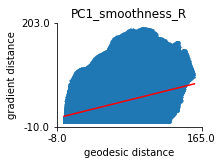

In [3]:
Hemi = 'R'  # L or R
gradient_name = 'PC1'  # PC1 or PC2
vis_name = f'MMP-vis3-{Hemi}'
figsize = (3.2, 2.4)
gradient_dist_file = pjoin(data_dir, f'gradient_distance_{Hemi}.mat')
geodesic_dist_file = pjoin(data_dir, f'geodesic_distance_{Hemi}.mat')
out_name = f'{gradient_name}_smoothness_{Hemi}'
out_file = pjoin(work_dir, f'{out_name}.jpg')
out_file = 'show'

def statistic(x, y):
    return pearsonr(x, y)[0]

gradient_dist = loadmat(gradient_dist_file)
geodesic_dist = loadmat(geodesic_dist_file)

x = geodesic_dist['data'][0]
y = gradient_dist[gradient_name][0]
fig, ax = plt.subplots(1, 1, figsize=figsize)
print(f'---{out_name}---')
plot_polyfit(x, y, 1, color='r', s=1, ax=ax)
# pmt_test = permutation_test(
#         (x, y), statistic, permutation_type='pairings',
#         vectorized=False, n_resamples=10, alternative='greater',
#         random_state=7, batch=10)
# print('pmt_test.statistic:\n', pmt_test.statistic)
# print('pmt_test.pvalue:\n', pmt_test.pvalue)
print("pearsonr(x, y, alternative='greater'):\n",
      pearsonr(x, y, alternative='greater'))
xlim = ax.get_xlim()
xlim = (np.floor(xlim[0]), np.ceil(xlim[1]))
ax.set_xticks(xlim)
ax.set_xticklabels(xlim)
ylim = ax.get_ylim()
ylim = (np.floor(ylim[0]), np.ceil(ylim[1]))
ax.set_yticks(ylim)
ax.set_yticklabels(ylim)
ax.set_xlabel('geodesic distance')
ax.set_ylabel('gradient distance')
ax.set_title(out_name)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# Gradient correlates with RSFC

x.min(), x.max():
 -0.05199934122193598 0.90659264204795
y.min(), y.max():
 0.00024222393788434843 8.885579506237901
---2D-PC-zscore-corr-RSFC_R---
polynomial:
  
-8.375 x + 2.235

score: PearsonRResult(statistic=0.42127394918001726, pvalue=0.0)
pearsonr PearsonRResult(statistic=-0.4212739491800173, pvalue=0.0)


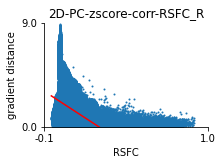

In [3]:
Hemi = 'R'  # L or R
gradient_name = '2D-PC-zscore'  # PC1, PC2, 2D-PC, 2D-PC-zscore
vis_name = f'MMP-vis3-{Hemi}'
figsize = (3.2, 2.4)
gradient_dist_file = pjoin(data_dir, f'gradient_distance_{Hemi}.mat')
rsfc_file = pjoin(data_dir, f'HCPY-avg_RSFC-{vis_name}.mat')
out_name = f'{gradient_name}-corr-RSFC_{Hemi}'
out_file = pjoin(work_dir, f'{out_name}.jpg')
# out_file = 'show'

gradient_dist = loadmat(gradient_dist_file)
rsfc_dist = loadmat(rsfc_file)

x = rsfc_dist['data'][0]
print('x.min(), x.max():\n', x.min(), x.max())
y = gradient_dist[gradient_name][0]
print('y.min(), y.max():\n', y.min(), y.max())
fig, ax = plt.subplots(1, 1, figsize=figsize)
print(f'---{out_name}---')
plot_polyfit(x, y, 1, color='r', s=1, ax=ax)
print('pearsonr', pearsonr(x, y))
# xlim = ax.get_xlim()
ctx = decimal.getcontext()
ctx.rounding = decimal.ROUND_FLOOR
xlim_left = round(Decimal(str(x.min())), 1)
ctx.rounding = decimal.ROUND_CEILING
xlim_right = round(Decimal(str(x.max())), 1)
xlim = (xlim_left, xlim_right)
ax.set_xlim(*xlim)
ax.set_xticks(xlim)
ax.set_xticklabels(xlim)
# ylim = ax.get_ylim()
ylim = (np.floor(y.min()), np.ceil(y.max()))
ax.set_ylim(*ylim)
ax.set_yticks(ylim)
ax.set_yticklabels(ylim)
ax.set_xlabel('RSFC')
ax.set_ylabel('gradient distance')
ax.set_title(out_name)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)